In [22]:
import json
import pandas as pd
import numpy as np
import mltools as ml
# import relevant parts of sklearn
from sklearn import cluster, datasets, linear_model, preprocessing
from sklearn.metrics import *
#mean_squared_error, r2_score

# We'll also import seaborn, a Python graphing library
# (you may need to run >conda install seaborn (if using Anaconda)) 
import seaborn as sns

# and matplotlib
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True) 
plt.style.use('ggplot')
%matplotlib inline

import scipy.stats as stats

# and turn off annoying warnings...(if we were writing "real code" we shouldn't do this)
import warnings 
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# import data

In [71]:
user = pd.read_csv('D:/1UCI/UCI/170B project source/user(3).csv')  

In [72]:
len(user)

39805

In [73]:
user[3:6]

,date,source_reliability,gender,Age,confirmed_number,account_age,user_attitude,followers_count,friends_count,stateName,domain,reliability
3,2020-01-22,a,Male,(48-53),555,10,neutral,23,307,Kentucky,twitter,FAKE
4,2020-01-22,a,Female,(25-32),555,11,positive,2908,1746,New York,cnbc,FAKE
5,2020-01-22,a,Male,(25-32),555,11,negative,19208,6979,Texas,npr,REAL


In [74]:
# set X and Y for model 

In [75]:
np.random.seed(0)
Y = user[user.columns[-1]]
#Y = user[user.columns[-1]].astype('category').cat.codes
X= user[['followers_count','friends_count','stateName',"source_reliability","Age","gender","confirmed_number",'account_age','user_attitude']]
X["stateName"] = X["stateName"].astype('category').cat.codes
X["source_reliability"] = X["source_reliability"].astype('category').cat.codes
X['user_attitude'] = X['user_attitude'].astype('category').cat.codes
X["Age"] = X["Age"].astype('category').cat.codes
X["gender"] = X["gender"].astype('category').cat.codes
X["confirmed_number"] = X["confirmed_number"]
X['account_age'] = X['account_age']

In [76]:
# knn 

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
k = 100
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
yp=knn.predict(X_test).tolist()
ypp=knn.predict(X_train).tolist()
    
count=0
for i in range(len(yp)):
    if yp[i] != y_test.tolist()[i]:
        count+=1
print("K-value=",k," Error Rate for test data =",count/len(yp))
    
count2=0
for i in range(len(ypp)):
    if ypp[i] != y_train.tolist()[i]:
        count2+=1
print("K-value=",k," Error Rate for training data =",count2/len(ypp))


K-value= 100  Error Rate for test data = 0.20113883771562552
K-value= 100  Error Rate for training data = 0.2065822057926282


In [78]:
# random forest

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=2000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8125104672584157


In [81]:
# feature importance from Random Forest Model

Feature ranking:
1. feature 0 (0.213040)
2. feature 1 (0.209704)
3. feature 6 (0.156503)
4. feature 3 (0.121234)
5. feature 2 (0.110708)
6. feature 7 (0.085126)
7. feature 4 (0.040553)
8. feature 8 (0.040542)
9. feature 5 (0.022590)


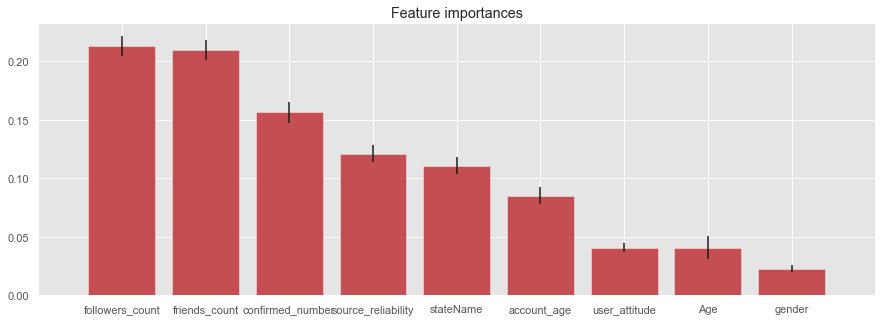

In [82]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xticks(range(X.shape[1]),['followers_count', 'friends_count', 'confirmed_number', 'source_reliability','stateName','account_age',  'user_attitude','Age', 'gender'])
plt.show()